##### Author: Nisha Sundaram

# Data Analysis

In [3]:
# importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the csv in a new varaible

In [4]:
cars_new = pd.read_csv('cars_dataset_cleaned.csv', sep= ";", index_col=None, header=0, engine ='python')

In [16]:
cars_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16217 entries, 0 to 16216
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   car_brand              16217 non-null  object 
 1   body_type              16217 non-null  object 
 2   condition              16217 non-null  object 
 3   num_seats              16217 non-null  int64  
 4   num_doors              16217 non-null  int64  
 5   mileage                16217 non-null  int64  
 6   first_reg              16217 non-null  object 
 7   power_kW               16217 non-null  int64  
 8   transmission           16217 non-null  object 
 9   displacement           16217 non-null  float64
 10  fuel                   16217 non-null  object 
 11  fuel_eff               16217 non-null  object 
 12  color                  16217 non-null  object 
 13  seller                 16217 non-null  object 
 14  brand                  16217 non-null  object 
 15  mo

##### The column "price” is the target variable and rest of the columns are independent variables.
##### The independent variables are again divided into Numerical and Categorical variables.

## Numerical

In [17]:
cars_new.select_dtypes(exclude=['object'])

,num_seats,num_doors,mileage,power_kW,displacement,price,year_built,num_owners,co2_emission_gpkm,fuel_eff_combi_lpkm,fuel_eff_city_lpkm,fuel_eff_highway_lpkm
0,5,5,320000,103,1968.0,3000,2021,2,111,4,4,3
1,4,4,8985,48,999.0,9990,2021,1,99,4,5,3
2,4,4,10200,48,999.0,7300,2021,1,102,4,5,3
3,5,4,20000,67,999.0,3990,2021,1,117,6,5,4
4,4,2,3900,53,998.0,9900,2021,1,93,4,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...
16212,5,5,11683,215,1998.0,77219,2021,1,43,1,0,0
16213,5,4,10,67,999.0,19990,2021,1,117,5,6,4
16214,5,5,26300,81,999.0,24710,2021,1,116,5,6,4
16215,5,5,24900,110,1995.0,29870,2021,1,114,4,4,4


In [6]:
cars_new.select_dtypes(exclude=['object']).shape

(16217, 12)

## Categorical

In [18]:
cars_new.select_dtypes(include=['object']).shape

(16217, 12)

In [8]:
cars_new.select_dtypes(include=['object']).isna().sum()

car_brand        0
body_type        0
condition        0
first_reg        0
transmission     0
fuel             0
fuel_eff         0
color            0
seller           0
brand            0
model            0
model_details    0
dtype: int64

In [10]:
cars_new['price'].describe()

count     16217.000000
mean      47551.534871
std       23043.679595
min        3000.000000
25%       28880.000000
50%       42950.000000
75%       63980.000000
max      100000.000000
Name: price, dtype: float64

#### We can use the Target variable “price” to understand the correlation of numerical variables with it.

In [19]:
numeric_cols = cars_new.select_dtypes(include=[np.number])
corr = numeric_cols.corr()
print('Top ten Correlated Features with Price:'), print(corr['price'].sort_values(ascending = False)[:10], '\n')
print('Top two Uncorrelated Features with Price:'), print(corr['price'].sort_values(ascending = False)[-10:])

Top ten Correlated Features with Price:
price                    1.000000
power_kW                 0.781683
displacement             0.766476
co2_emission_gpkm        0.423809
fuel_eff_combi_lpkm      0.344273
fuel_eff_city_lpkm       0.285967
fuel_eff_highway_lpkm    0.282007
mileage                  0.171912
num_seats                0.071724
year_built               0.047757
Name: price, dtype: float64 

Top two Uncorrelated Features with Price:
displacement             0.766476
co2_emission_gpkm        0.423809
fuel_eff_combi_lpkm      0.344273
fuel_eff_city_lpkm       0.285967
fuel_eff_highway_lpkm    0.282007
mileage                  0.171912
num_seats                0.071724
year_built               0.047757
num_owners              -0.001403
num_doors               -0.196387
Name: price, dtype: float64


(None, None)

#### From the above, we can infer that the columns 'num_owners' and 'num_doors' are negativley correlated. So, we can drop thme in our model.

#### Now let’s plot Heatmap which is pretty useful to visualise multiple correlations among numerical variables. 
### Heatmap to show correlation of Numerical and Target variable:

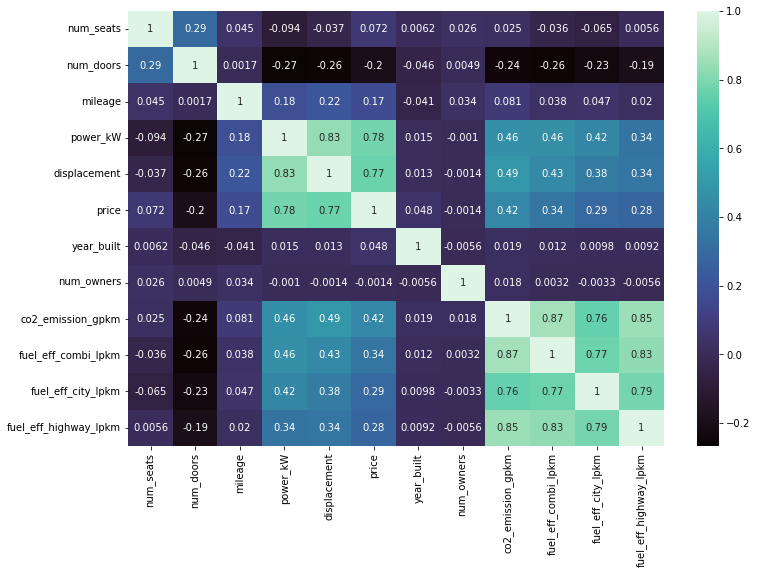

In [20]:
plt.subplots(figsize=(12,8))
corrMatrix = cars_new.select_dtypes(exclude=['object']).corr()
sns.heatmap(corrMatrix, annot=True, cmap='mako')
plt.show()

##### NOTE: Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend between the two variables. 
##### The close to 1 the correlation is the more positively correlated they are; 
##### that is as one increases so does the other and the closer to 1 the stronger this relationship is.

#### INFERENCE: We can see that the NUMERICAL columns 'power_kW', 'displacement', 'co2_emission_gpkm', 'fuel_eff_combi_lpkm', 'fuel_eff_city_lpkm', 'fuel_eff_hihgway_lpkm' are postively correlated with the 'price' column. We shall include these in our models.

### Plotting scatter plot to check the correlated features with the 'price'

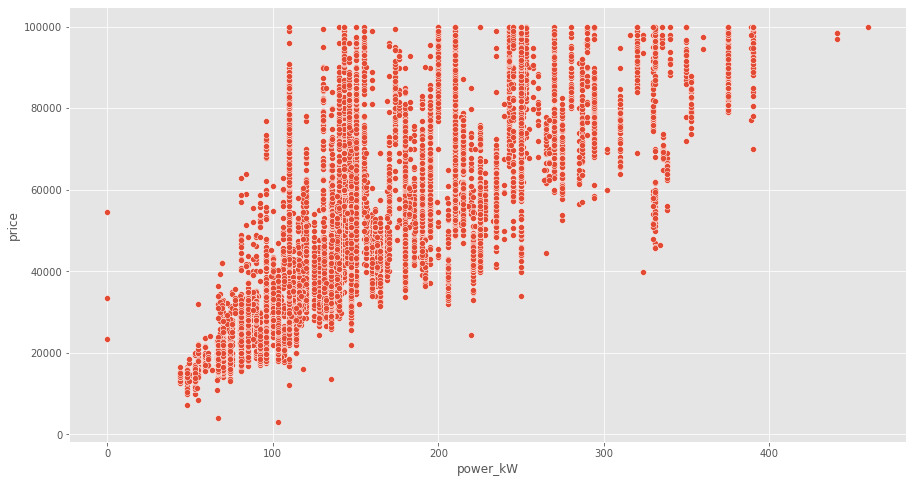

In [32]:
plt.figure(figsize=(15,8))
sns.scatterplot(x = cars_new['power_kW'], y = cars_new['price'])
plt.ylabel('price')
plt.xlabel('power_kW')
plt.show()